In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Diabeties.csv")
df.head()

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Goal:-- we need to build a model which has ability to predict positive when the patient os positive
    in other word we need to reduce False negative error(Type 2 error)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   glocose    768 non-null    int64  
 2   bp         768 non-null    int64  
 3   skin       768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   predigree  768 non-null    float64
 7   age        768 non-null    int64  
 8   target     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


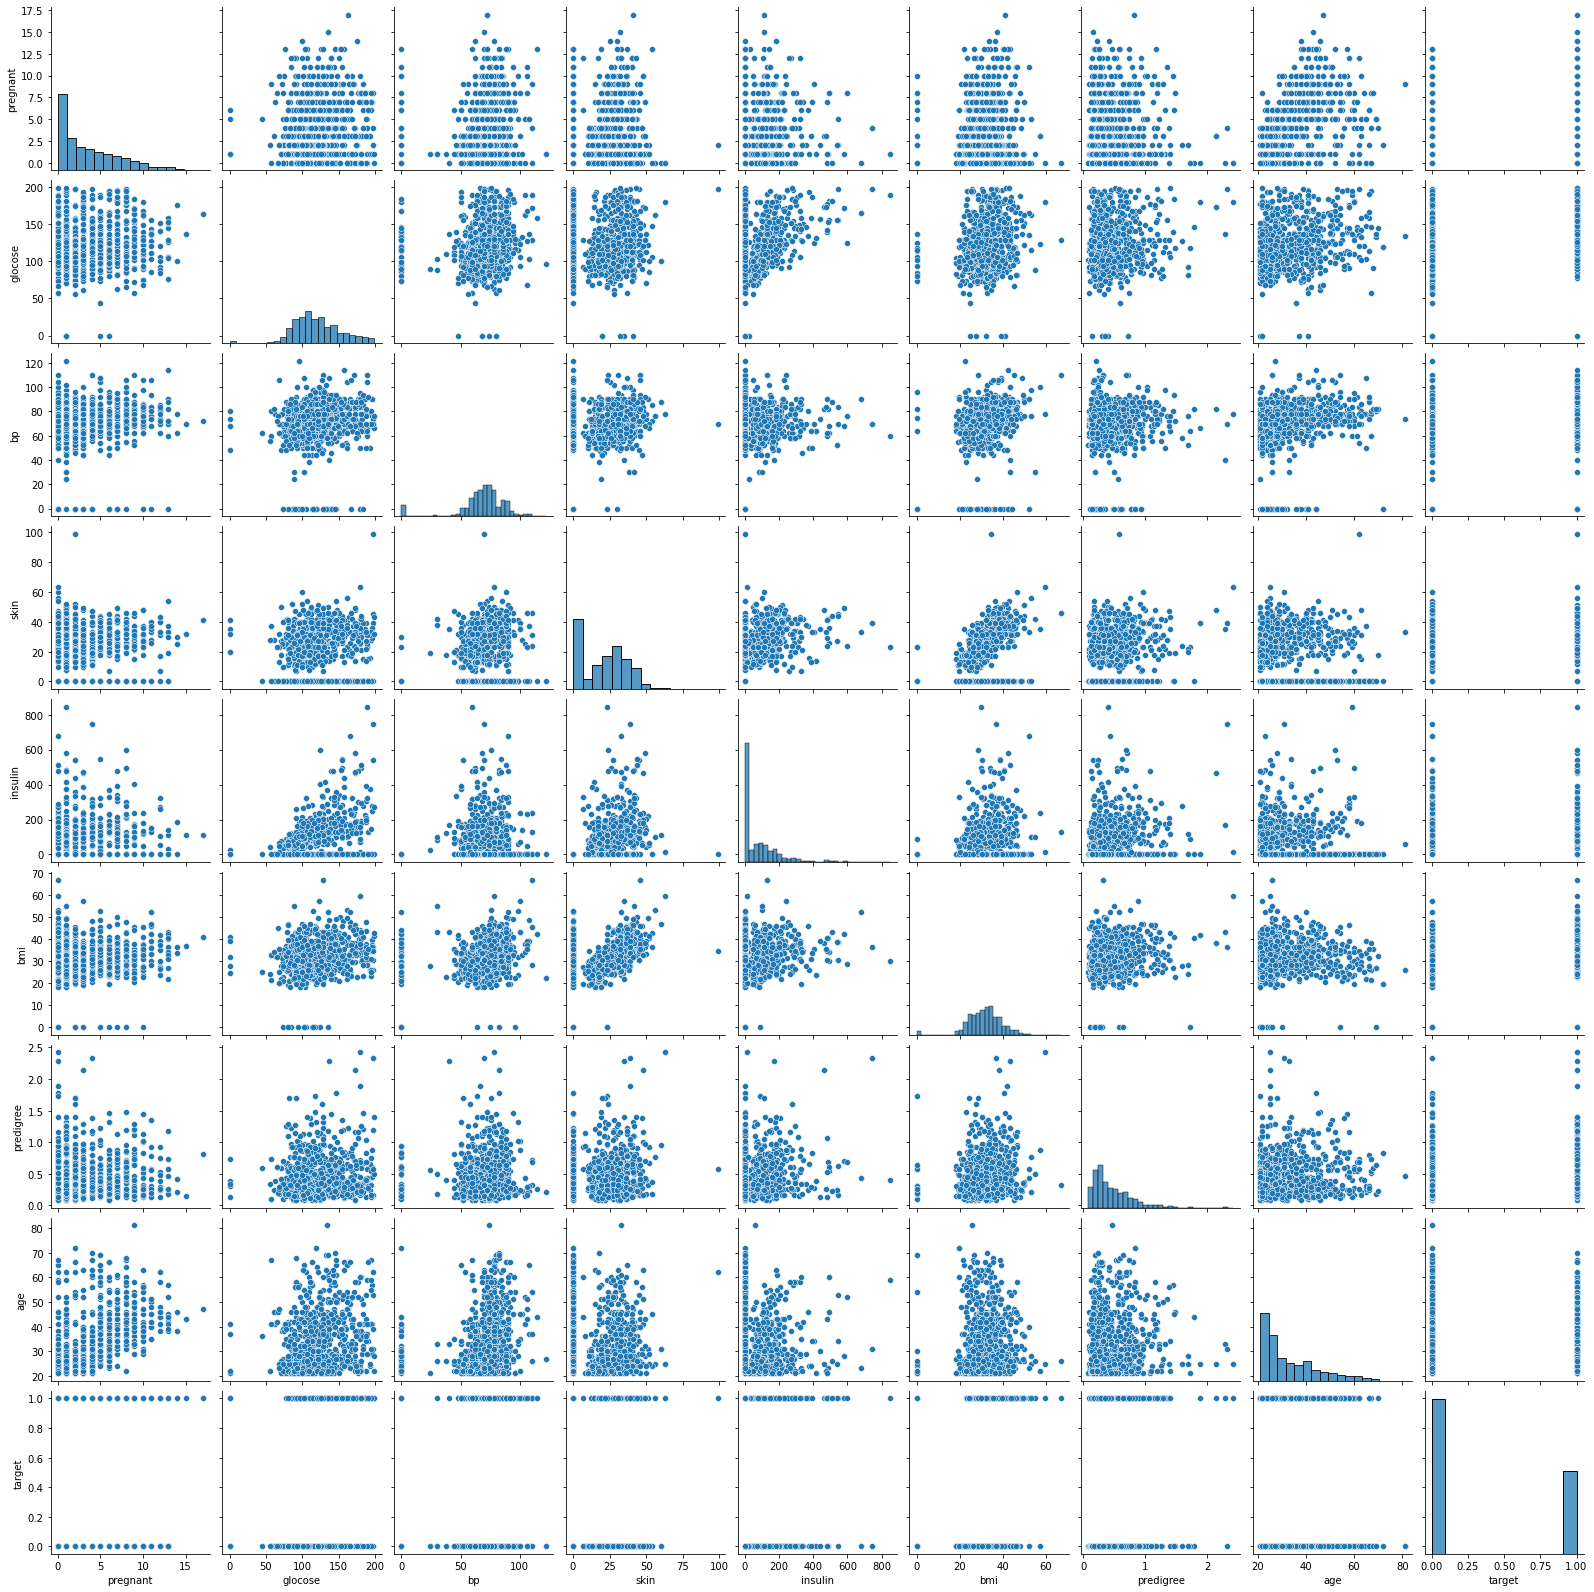

In [5]:
sns.pairplot(df)

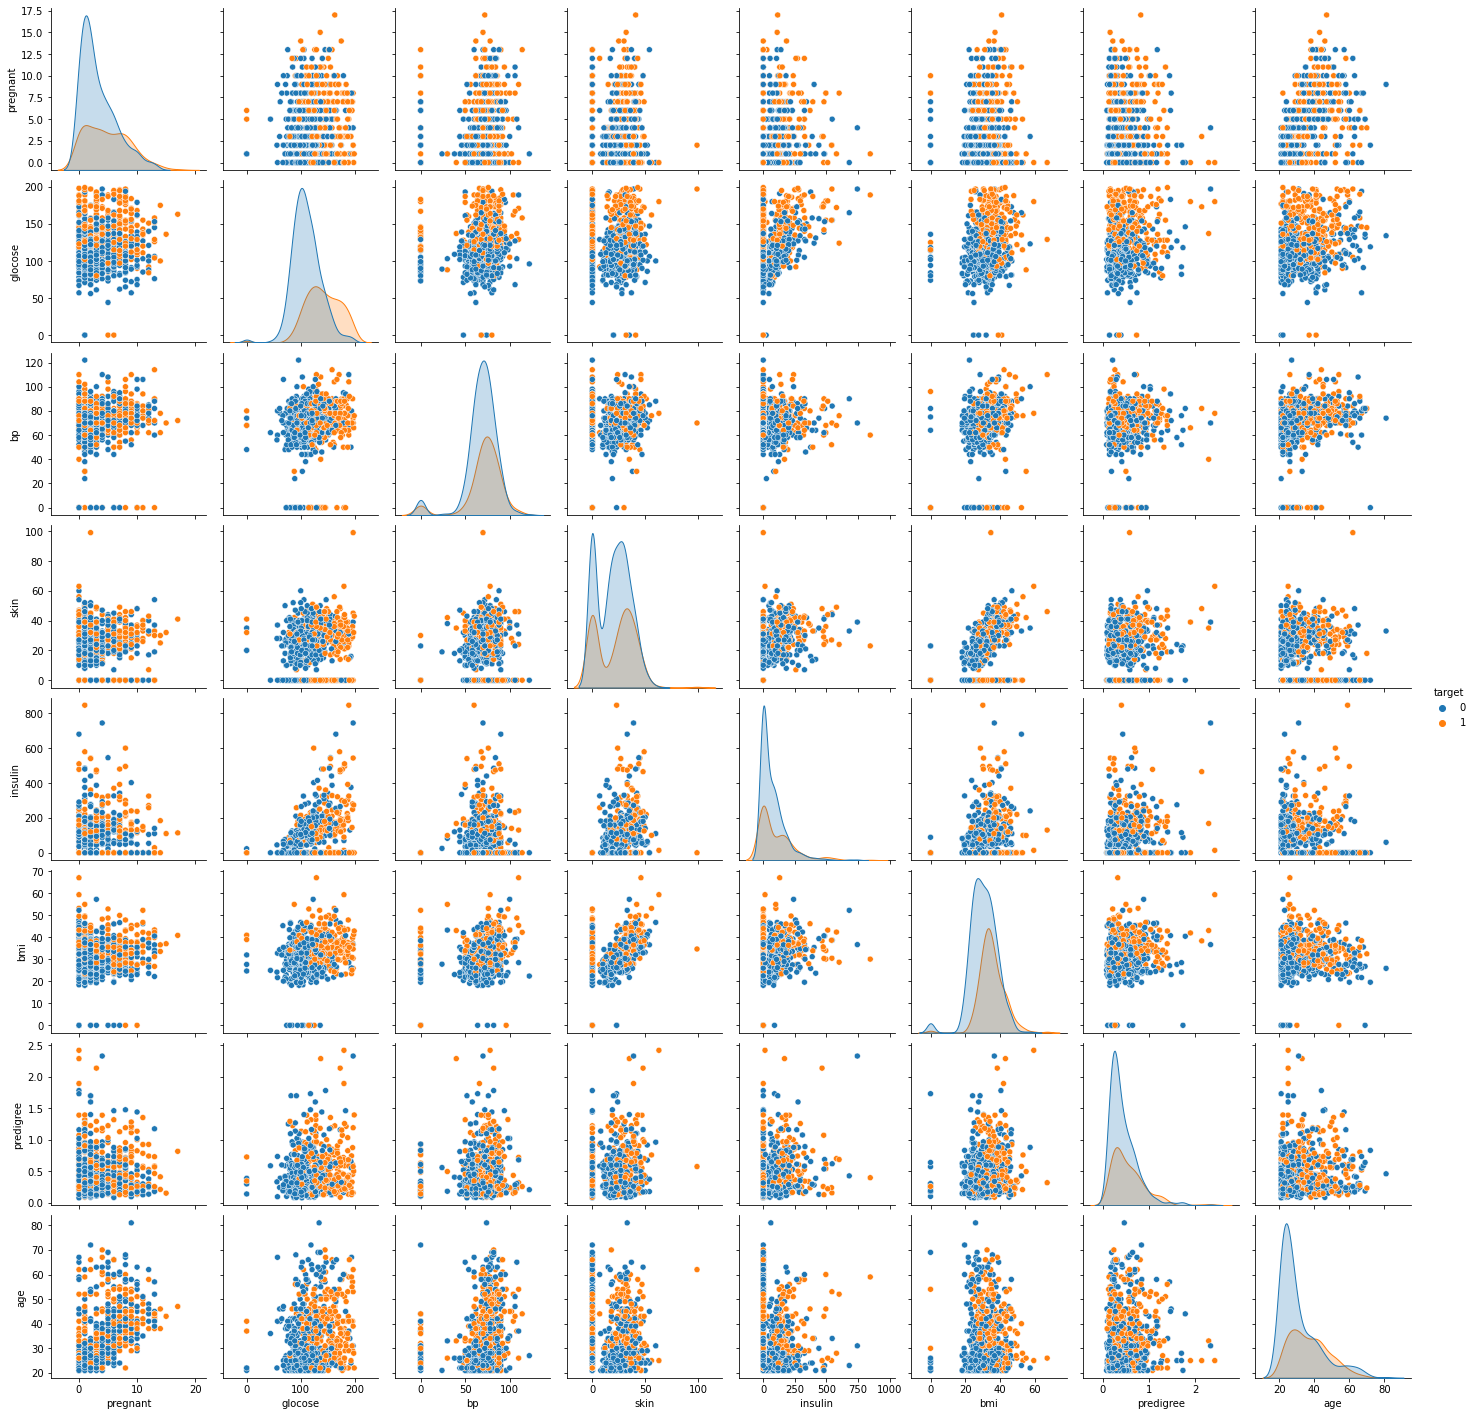

In [6]:
sns.pairplot(data=df,hue="target")

In [7]:
df.target.value_counts()

0    500
1    268
Name: target, dtype: int64

# Here there is more people who have diabeties than nondiabetics so the data is imbalance so we get underfitting

# 

# create model

In [14]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,confusion_matrix
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
ar = roc_auc_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
print(f"Accuracy: {ac}\nROC: {ar}\n {cm}\n\n{cr}")

Accuracy: 0.7835497835497836
ROC: 0.740290088638195
 [[132  14]
 [ 36  49]]

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



# here we get a got accuracy of 78% but our recall score of category 1 is 58%(i.e if there are 100 dibetic people our model only identifies 58 patitents are dibetic rest 42 are concider non diabetic which is not that great there is lot of type 2 error)
and also there is more type 2 error (i.e 36)

In [13]:
train = logreg.score(xtrain,ytrain)
test = logreg.score(xtest,ytest)

print(f"Training Accuracy : {train}")
print(f"Testing Accuracy : {test}")

Training Accuracy : 0.7728119180633147
Testing Accuracy : 0.7835497835497836


# we have created a bestfit model with low bias and low varience but recall score is not good

In [15]:
print(f"Actual values    :{ytest[:25].values}")
print(f"Predicted values :{ypred[:25]}")

Actual values    :[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0]
Predicted values :[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0]


In [16]:
print(f"Actual values    :{ytest[25:51].values}")
print(f"Predicted values :{ypred[25:51]}")

Actual values    :[0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0]
Predicted values :[0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0]


In [17]:
logreg.predict_proba(xtest)

array([[0.58040259, 0.41959741],
       [0.69594778, 0.30405222],
       [0.85394846, 0.14605154],
       [0.94499853, 0.05500147],
       [0.79048325, 0.20951675],
       [0.72197298, 0.27802702],
       [0.64280874, 0.35719126],
       [0.89586962, 0.10413038],
       [0.83496644, 0.16503356],
       [0.7887989 , 0.2112011 ],
       [0.56950766, 0.43049234],
       [0.92486154, 0.07513846],
       [0.01884591, 0.98115409],
       [0.27328601, 0.72671399],
       [0.97528391, 0.02471609],
       [0.28338102, 0.71661898],
       [0.76400414, 0.23599586],
       [0.69651895, 0.30348105],
       [0.87011816, 0.12988184],
       [0.84402523, 0.15597477],
       [0.61772163, 0.38227837],
       [0.86680724, 0.13319276],
       [0.04823454, 0.95176546],
       [0.7390839 , 0.2609161 ],
       [0.92726257, 0.07273743],
       [0.59294201, 0.40705799],
       [0.79790838, 0.20209162],
       [0.27468328, 0.72531672],
       [0.9182795 , 0.0817205 ],
       [0.54149993, 0.45850007],
       [0.

In [23]:
ypredprob=logreg.predict_proba(xtest)[:,1]

In [24]:
ypredprob #probability of person for being diabetics

array([0.41959741, 0.30405222, 0.14605154, 0.05500147, 0.20951675,
       0.27802702, 0.35719126, 0.10413038, 0.16503356, 0.2112011 ,
       0.43049234, 0.07513846, 0.98115409, 0.72671399, 0.02471609,
       0.71661898, 0.23599586, 0.30348105, 0.12988184, 0.15597477,
       0.38227837, 0.13319276, 0.95176546, 0.2609161 , 0.07273743,
       0.40705799, 0.20209162, 0.72531672, 0.0817205 , 0.45850007,
       0.40717818, 0.32552151, 0.05376155, 0.70135586, 0.12923796,
       0.66577403, 0.08926239, 0.18089388, 0.10293578, 0.62330337,
       0.21034341, 0.08630536, 0.03882735, 0.28131431, 0.07063732,
       0.02336241, 0.75626845, 0.81145052, 0.07646663, 0.14229555,
       0.0085981 , 0.17865381, 0.83455723, 0.05093133, 0.74527531,
       0.10061923, 0.61654805, 0.29828186, 0.56269222, 0.17071023,
       0.61625479, 0.01318304, 0.71596099, 0.2204561 , 0.37406602,
       0.11151139, 0.01522914, 0.3565858 , 0.70100983, 0.60282301,
       0.88110201, 0.75329488, 0.58199874, 0.01784849, 0.68146

In [25]:
from sklearn.preprocessing import binarize

In [29]:
ypred=binarize([ypredprob],threshold=0.30)[0]

In [32]:
print(f"Actual values    :{ytest[:25].values}")
print(f"Predicted values :{ypred[:25]}")

Actual values    :[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0]
Predicted values :[1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.
 0.]


In [33]:
print(f"Actual values    :{ytest[:25].values}")
print(f"Predicted values :{ypred[:25].astype(int)}")

Actual values    :[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0]
Predicted values :[1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0]


In [34]:
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
ar = roc_auc_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
print(f"Accuracy: {ac}\nROC: {ar}\n {cm}\n\n{cr}")

Accuracy: 0.7705627705627706
ROC: 0.7767123287671234
 [[110  36]
 [ 17  68]]

              precision    recall  f1-score   support

           0       0.87      0.75      0.81       146
           1       0.65      0.80      0.72        85

    accuracy                           0.77       231
   macro avg       0.76      0.78      0.76       231
weighted avg       0.79      0.77      0.77       231



In [35]:
train = logreg.score(xtrain,ytrain)
test = logreg.score(xtest,ytest)

print(f"Training Accuracy : {train}")
print(f"Testing Accuracy : {test}")

Training Accuracy : 0.7728119180633147
Testing Accuracy : 0.7835497835497836


# Draw the ROC Curve

In [36]:
from sklearn.metrics import roc_curve

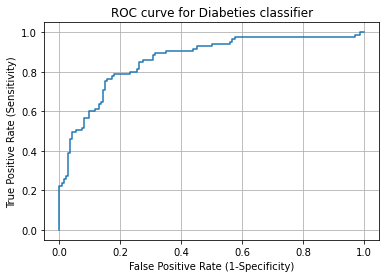

In [38]:
fpr, tpr, thres = roc_curve(ytest,ypredprob)
plt.plot(fpr,tpr)

plt.title("ROC curve for Diabeties classifier")
plt.xlabel("False Positive Rate (1-Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.grid()
plt.show()